In [1]:
#
# Emre Alca
# University of Pennsylvania
# Created on Thu Jan 22 2026
# Last Modified: Thu Jan 22 2026 1:32:23 PM
#

In [2]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D)
import tqdm

from IPython.display import HTML

%matplotlib widget

from src import spindle_state as ss
import pickle
import os

In [3]:
file_path1 = '/Users/emrealca/Documents/Penn/flatiron-microtubules/simulations/data/1d-validation/[1 3]_2026-01-22_10-11-06.pkl'
file_path2 = '/Users/emrealca/Documents/Penn/flatiron-microtubules/simulations/data/1d-validation/[3 1]_2026-01-22_10-12-39.pkl'

def file_path_to_data(file_path):
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    return data

def format_traj(trajectory):

    ts = list(trajectory.keys())

    xs = []
    ys = []
    zs = []
    spindle_states = []

    for key in list(trajectory.keys()):

        xs.append(trajectory[key]['mtoc_pos'][0])
        ys.append(trajectory[key]['mtoc_pos'][1])
        zs.append(trajectory[key]['mtoc_pos'][2])

        spindle_states.append(trajectory[key]['spindle_state'].astype(int))

    spindle_states = np.array(spindle_states)

    reformatted_trajectory = np.column_stack([ts, xs])

    traj_to_plot = reformatted_trajectory[::10]

    return traj_to_plot

data1 = file_path_to_data(file_path1)
traj1 = format_traj(data1['trajectory'])

data2 = file_path_to_data(file_path2)
traj2 = format_traj(data2['trajectory'])

traj1

array([[0.001, -0.000],
       [0.011, -0.000],
       [0.021, -0.000],
       ...,
       [50.671, -0.999],
       [50.681, -1.000],
       [50.691, -1.000]], shape=(5070, 2))

In [4]:
spindle_state1 = data1['spindle']['spindle_state'].astype(int)
site_color_list1 = np.where((data1['spindle']['spindle_state'] == 1) + (data1['spindle']['spindle_state'] == 2), 'tab:orange', 'tab:purple')

spindle_state2 = data2['spindle']['spindle_state'].astype(int)
site_color_list2 = np.where((data2['spindle']['spindle_state'] == 1) + (data2['spindle']['spindle_state'] == 2), 'tab:orange', 'tab:purple')

datas = (data1, data2)

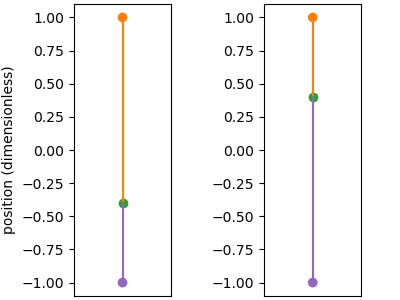

In [5]:
fig, axs = plt.subplots(
    1, 
    2,
    # sharey=True,
    figsize=(4, 3),
    constrained_layout=True
    )

i = 2000

axs[0].set_ylabel('position (dimensionless)')

for a in range(len(axs)):

    traj = format_traj(datas[a]['trajectory'])
    axs[a].set_box_aspect(3 / 1)
    axs[a].xaxis.set_visible(False)

    site_color_list = np.where((datas[a]['spindle']['spindle_state'] == 1) + (datas[a]['spindle']['spindle_state'] == 2), 'tab:orange', 'tab:purple')

    plotted_lattice_sites = axs[a].scatter(np.zeros(len(datas[a]['spindle']['lattice_sites'][:,0])), datas[a]['spindle']['lattice_sites'][:,0], c=site_color_list1)

    t = traj[i, 0] 
    present_mt_lattices = datas[a]['spindle']['lattice_sites'][np.where(np.isin(datas[a]['trajectory'][t]['spindle_state'], [2, 4]))][:,0]
    mt_lines = []
    for mt in range(len(present_mt_lattices)):
        mt_lines.append(axs[a].plot(np.zeros(2), np.array([present_mt_lattices[mt], traj[i, 1]]), c=site_color_list1[mt]))

    plotted_mtoc = axs[a].scatter(0, traj[i, 1], color='tab:green', label='mtoc')

plt.show()
    